<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-08-08-tree-based-models-bagging-grf-regression-forest-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2.8.8 Regression Forest

A **regression forest**, as implemented in the `{grf}` package in R, is a machine learning model based on random forests, specifically designed for regression tasks, with extensions for causal inference and heterogeneous treatment effect estimation. The `{grf}` package (Generalized Random Forests) provides a flexible framework for building random forests tailored to various statistical tasks, including regression, causal inference, quantile regression, and more. Below, I’ll explain the concept of a regression forest, its implementation in `{grf}`, and its key features.



## Overview

A regression forest is an ensemble learning method that extends the random forest algorithm, originally proposed by Breiman (2001), to predict continuous outcomes (regression) or estimate causal effects. It combines multiple decision trees, each trained on a random subset of the data and features, to produce robust and accurate predictions. The key idea is to average the predictions of many trees to reduce variance and improve generalization. However, A regression forest in the {grf} package in R differs from a regular random forest (as implemented in packages like {randomForest} or {ranger}) in several key ways, primarily due to its focus on advanced statistical tasks like `causal inference`, `honest estimation,` and flexibility for `heterogeneous treatment effects`. The regression forest in {grf} is specifically used to estimate conditional mean outcomes, i.e., predicting a continuous outcome variable based on covariates.



### Key Features of Regression Forests in `{grf}

1. Random Forest Foundation

   - A regression forest consists of many decision trees, each trained on a bootstrap sample of the data.
   - At each node of a tree, a random subset of features is considered for splitting, reducing overfitting and improving robustness.
   - Predictions are made by averaging the outputs of all trees for a given input.

2. Honest Splitting

   - `{grf}` implements "honest" forests, where the data used to determine the tree structure (splitting) is separate from the data used to estimate the leaf values. This reduces bias in predictions, especially in causal inference settings.

3. Local Linear Corrections

   - For regression tasks, `{grf}` can apply local linear adjustments to improve predictions near specific points in the feature space, making the model more flexible than standard random forests.

4. Causal Inference

   - Beyond standard regression, `{grf}` regression forests can estimate **causal effects**, such as the average treatment effect (ATE) or conditional average treatment effect (CATE). This is particularly useful in observational studies or randomized trials.
   - For example, the `causal_forest()` function in `{grf}` estimates how treatment effects vary across different covariate values.

5. Tuning and Flexibility

   - The package allows users to tune parameters like the number of trees, minimum node size, and sample fraction to balance bias and variance.
   - It automatically handles high-dimensional data and missing values through imputation techniques.


### How It Work

The `{grf}` package provides the `regression_forest()` function to build a regression forest. Here’s a high-level overview of how it works:

1. Input Data

   - A matrix of features ($X$) and a vector of continuous outcomes ($YY).
   - Optional parameters like the number of trees, minimum node size, and honesty settings.

2. Tree Construction

   - For each tree, a random subset of the data is sampled (with replacement, i.e., bootstrapping).
   - At each node, a random subset of features is considered, and the best split is chosen to minimize a loss function (e.g., mean squared error for regression).
   - If honesty is enabled, the data is split into two parts: one for building the tree structure and another for estimating leaf values.

3. Prediction

   - For a new data point, each tree predicts an outcome based on the leaf it falls into.
   - The final prediction is the average of all tree predictions (or a weighted average in some cases).

4. Output

   - For standard regression, the output is a predicted value for each input.
   - For causal inference tasks (using `causal_forest()`), the output includes estimated treatment effects or other statistical quantities.



### Advantages of `{grf}` Regression Forests

- `Flexibility`: Handles standard regression, causal inference, and quantile regression in one framework.
- `Robustness`: Performs well in high-dimensional settings and with noisy data.
- `Causal Inference`: Unique in its ability to estimate heterogeneous treatment effects, which is critical in fields like economics, medicine, and policy analysis.
- `Honesty`: Reduces bias in predictions, especially for causal inference tasks.
- `Scalability`: Efficiently handles large datasets with many features.


### Limitations

- `Computational Cost`: Training a large number of trees on big datasets can be slow, though `{grf}` is optimized for performance.
- `Interpretability`: While variable importance measures are available, random forests are less interpretable than simpler models like linear regression.
- `Tuning`: Requires careful tuning of parameters (e.g., number of trees, node size) for optimal performance.

### Key differences between Regression Forests in `{grf}` and Regular Random Forests


A **regression forest** in the `{grf}` package in R differs from a **regular random forest** (as implemented in packages like `{randomForest}` or `{ranger}`) in several key ways, primarily due to its focus on advanced statistical tasks like causal inference, honest estimation, and flexibility for heterogeneous treatment effects. Below, I outline the main differences in a concise and structured manner:


| Feature                     | Regular Random Forest | Regression Forest in `{grf}` |
|-----------------------------|-----------------------|-----------------------------|
| `Primary Use`             | Prediction            | Prediction, Causal Inference, Quantile Regression |
| `Honest Splitting`        | No                    | Yes (reduces bias)          |
| `Causal Inference`        | Limited               | Built-in (`causal_forest`)  |
| `Local Linear Corrections`| No                    | Yes                         |
| `Quantile Regression`     | Limited (requires add-ons) | Built-in (`quantile_forest`) |
| `Statistical Inference`   | Minimal               | Confidence intervals, asymptotic guarantees |
| `Theoretical Grounding`   | Empirical             | Advanced (Athey & Wager)    |
| `Speed`                   | Faster                | Slower (due to rigor)       |


- **Use Regular Random Forest** (`{randomForest}`, `{ranger}`):

  - For straightforward prediction tasks where speed and simplicity are priorities.
  - When you don’t need causal inference or advanced statistical features.
  - When working with large datasets and computational efficiency is critical.
  
- **Use Regression Forest in `{grf}`**:

  - For causal inference tasks (e.g., estimating treatment effects in observational studies or experiments).
  - When you need quantile regression or other advanced statistical outputs.
  - When unbiased estimation and statistical inference (e.g., confidence intervals) are important.
  - For research applications requiring theoretical guarantees or heterogeneous effect estimation.

## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [2]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314979 sha256=e4e36cff17a3e1b00a76a8fa9693430b260b1a712e0951793951b25fcb8c8bcd
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Regression Forest with R

This tutorial shows how to use the `regression_forest()` function of the `{grf}` package to predict continuous outcomes, such as housing prices, based on various features. We’ll cover data preparation, model fitting, prediction, and evaluation of the regression forest model.



### Load and Check Required Libraries

In [4]:
%%R
packages <- c('tidyverse',
              'plyr',
              'grf',
              'rdd',
              'survival',
              'mlbench',
              'Metrics'
         )

### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Verify Installation

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
tidyverse      plyr       grf       rdd  survival   mlbench   Metrics 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 


### Load R Packages

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))


### Check Loaded Packages

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:rdd"       "package:Formula"   "package:AER"      
 [4] "package:car"       "package:carData"   "package:lmtest"   
 [7] "package:zoo"       "package:sandwich"  "package:Metrics"  
[10] "package:mlbench"   "package:survival"  "package:grf"      
[13] "package:plyr"      "package:lubridate" "package:forcats"  
[16] "package:stringr"   "package:dplyr"     "package:purrr"    
[19] "package:readr"     "package:tidyr"     "package:tibble"   
[22] "package:ggplot2"   "package:tidyverse" "package:tools"    
[25] "package:stats"     "package:graphics"  "package:grDevices"
[28] "package:utils"     "package:datasets"  "package:methods"  
[31] "package:base"     


### Load and Prepare the Lung Dataset

The lung dataset contains survival data for lung cancer patients with variables like `time` (survival time), `status` (censoring indicator), `age`, s`ex`, and `ph.ecog` (ECOG performance score). We’ll simulate a binary `health_status `variable (1 = improved, 0 = not improved) and use age, sex, and ph.ecog as covariates.


In [6]:
%%R
# Load Boston Housing dataset
data(BostonHousing, package = "mlbench")
# Split data into training (70%) and test (30%) sets
# Set seed for reproducibility
set.seed(123)
n <- nrow(BostonHousing)
train_idx <- sample(1:n, size = 0.7 * n)
train_data <- BostonHousing[train_idx, ]
test_data <- BostonHousing[-train_idx, ]


### Prepare Features and Target Variable

In [7]:
%%R
# Prepare features (X) and target (Y) for training and test sets
# Convert categorical variables to numeric using one-hot encoding
X_train <- model.matrix(~ . - medv, data = train_data)[, -1]  # Exclude medv and intercept
Y_train <- train_data$medv
X_test <- model.matrix(~ . - medv, data = test_data)[, -1]   # Exclude medv and intercept
Y_test <- test_data$medv

# Verify that X_train and X_test are numeric
str(X_train)  # Should show a numeric matrix

 num [1:354, 1:13] 45.7461 6.6549 0.0664 0.6298 0.0144 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:354] "415" "463" "179" "14" ...
  ..$ : chr [1:13] "crim" "zn" "indus" "chas1" ...


## Fit Regression Forest Model

regression_forest() is a function from the `{grf}` package that fits a regression forest model to the training data. It uses the features (X_train) and target variable (Y_train) to build the model, with options for the number of trees and honesty.

In [8]:
%%R
# Fit regression forest
rf_model <- regression_forest(X_train,
                              Y_train,
                              num.trees = 500,
                              honesty = TRUE)
print(rf_model)  # Print model summary

GRF forest object of type regression_forest 
Number of trees: 500 
Number of training samples: 354 
Variable importance: 
    1     2     3     4     5     6     7     8     9    10    11    12    13 
0.032 0.001 0.012 0.002 0.020 0.363 0.012 0.024 0.003 0.011 0.017 0.011 0.493 


### Predict on Test Set and Evaluate Model

In [9]:
%%R
# Predict on test set
predictions <- predict(rf_model, X_test)$predictions

# Calculate RMSE and R-squared
rmse <- sqrt(mean((predictions - Y_test)^2))
sst <- sum((Y_test - mean(Y_test))^2)
sse <- sum((predictions - Y_test)^2)
r_squared <- 1 - sse / sst
# Print RMSE and R-squared
cat("Test Set RMSE:", rmse, "\n")
cat("Test Set R-squared:", r_squared, "\n")

Test Set RMSE: 4.046357 
Test Set R-squared: 0.8152404 


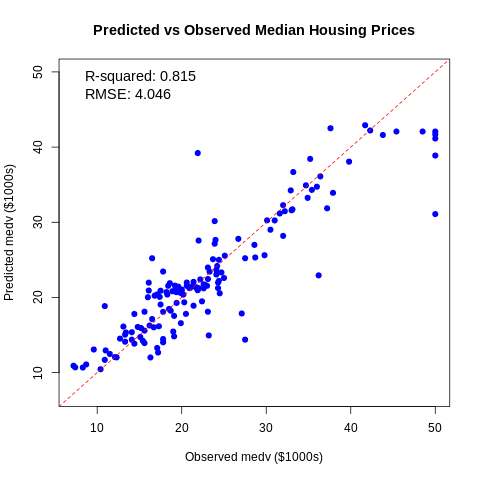

In [10]:
%%R
# Create scatter plot of predicted vs observed values
plot(Y_test, predictions,
     main = "Predicted vs Observed Median Housing Prices",
     xlab = "Observed medv ($1000s)",
     ylab = "Predicted medv ($1000s)",
     pch = 19, col = "blue",
     xlim = range(c(Y_test, predictions)),
     ylim = range(c(Y_test, predictions)))
abline(0, 1, col = "red", lty = 2)  # Add 45-degree reference line

# Add R-squared and RMSE to the plot
legend("topleft",
       legend = c(sprintf("R-squared: %.3f", r_squared),
                  sprintf("RMSE: %.3f", rmse)),
       bty = "n", cex = 1.2)

## Regression Forest for Causal Inference

To fit a **Regression Forest** using the `regression_forest()` function from the `{grf}` package in R for a causal inference task, we need to adapt the approach since `regression_forest()` is typically used for predicting conditional means ($E[Y | X]$) rather than directly estimating treatment effects like `causal_forest()`. However, we can use `regression_forest()` to estimate treatment effects indirectly by modeling the outcome $Y$ as a function of covariates $X$ and treatment $W$ then deriving treatment effects through predictions under different treatment conditions.

Use `regression_forest()` to estimate conditional mean outcomes and derive heterogeneous treatment effects ($\tau(X) = E[Y | X, W=1] - E[Y | X, W=0]$).




### Synthetic Data Generation

   - `X`: Matrix of 5 covariates drawn from a standard normal distribution.
   - `W`: Binary treatment indicator (0 or 1), randomly assigned with equal probability (simulating a randomized experiment).
   - `tau`: True treatment effect, set as $\tau = 2 \cdot X_1$, making it heterogeneous.
   - `Y`: Outcome, generated as $Y = X_1 + X_2^2 + \tau \cdot W + \text{noise}$.
   - `XW`: Combines covariates and treatment into a single matrix for modeling.


In [11]:
%%R
# Set seed for reproducibility
set.seed(123)

# Generate synthetic experimental data
n <- 1000  # Number of observations
p <- 5     # Number of covariates
X <- matrix(rnorm(n * p), n, p)  # Covariates
W <- rbinom(n, 1, 0.5)           # Binary treatment (0 or 1, balanced)
# True treatment effect: depends on X[,1]
tau <- 2 * X[, 1]  # Heterogeneous treatment effect
# Outcome: Y = baseline + treatment effect + noise
Y <- X[, 1] + X[, 2]^2 + tau * W + rnorm(n, 0, 0.5)

# Combine covariates and treatment into a single matrix
XW <- cbind(X, W)

### Fitting the Regression Forest

   - The `regression_forest()` function models $E[Y | X, W]$.
   - Key parameters:
     - `X = XW`: Covariates including the treatment variable $W$.
     - `Y`: Outcome variable.
     - `num.trees = 1000`: Number of trees for robust estimation.
     - `honesty = TRUE`: Uses honest splitting to reduce bias.
     - `min.node.size = 5`: Minimum number of observations per node.
     - `sample.fraction = 0.5`: Fraction of data used per tree.
     - `ci.group.size = 2`: Groups trees for variance estimation.

In [12]:
%%R
# Fit regression forest
rf <- regression_forest(
  X = XW,
  Y = Y,
  num.trees = 1000,
  honesty = TRUE,
  min.node.size = 5,
  sample.fraction = 0.5,
  ci.group.size = 2
)
rf

GRF forest object of type regression_forest 
Number of trees: 1000 
Number of training samples: 1000 
Variable importance: 
    1     2     3     4     5     6 
0.720 0.172 0.017 0.017 0.025 0.049 


###  Predicting Treatment Effects

   - To estimate the Conditional Average Treatment Effect (CATE), we predict outcomes for each observation under treatment ($W=1$) and control ($W=0$).
   - `XW_treat` and `XW_control`: Datasets with $W$ set to 1 and 0, respectively.
   - `tau_hat`: Estimated treatment effect as the difference in predicted outcomes ($\hat{\tau}(X) = \hat{Y}(X, W=1) - \hat{Y}(X, W=0)$).
   - `tau_se`: Standard error of the treatment effect, computed as the square root of the sum of variances for treatment and control predictions.

In [13]:
%%R
# Predict outcomes under treatment (W=1) and control (W=0)
# Create datasets for W=1 and W=0
XW_treat <- cbind(X, W = 1)
XW_control <- cbind(X, W = 0)

# Predict outcomes
pred_treat <- predict(rf, newdata = XW_treat, estimate.variance = TRUE)
pred_control <- predict(rf, newdata = XW_control, estimate.variance = TRUE)

# Estimate treatment effects
tau_hat <- pred_treat$predictions - pred_control$predictions
tau_se <- sqrt(pred_treat$variance.estimates + pred_control$variance.estimates)

### Evalute the Model

   - Compare predicted treatment effects ($\hat{\tau}$) with true treatment effects ($\tau$).
   - Calculate Mean Squared Error (MSE) to evaluate the accuracy of CATE estimates.
   - Variable importance can be assessed to understand the contribution of each feature in predicting treatment effects.

In [14]:
%%R
# Evaluate model: Compare predicted vs true treatment effects
mean_squared_error <- mean((tau_hat - tau)^2)
cat("Mean Squared Error of CATE estimates:", mean_squared_error, "\n")

Mean Squared Error of CATE estimates: 0.2688863 


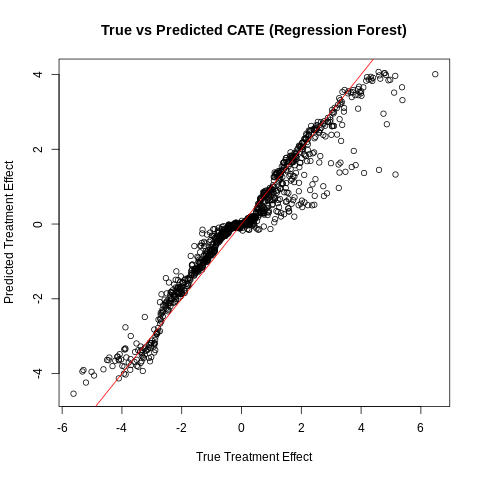

In [15]:
%%R
#  Plot predicted vs true treatment effects
plot(tau, tau_hat,
     xlab = "True Treatment Effect",
     ylab = "Predicted Treatment Effect",
     main = "True vs Predicted CATE (Regression Forest)")
abline(0, 1, col = "red")  # 45-degree line

### Variable Importance

   - Assess variable importance to understand which features contribute most to the model's predictions.
   - The `variable_importance()` function provides a measure of how much each feature contributes to the prediction accuracy.


Variable Importance:
           [,1]
[1,] 0.72017879
[2,] 0.17242602
[3,] 0.01692080
[4,] 0.01712028
[5,] 0.02479139
[6,] 0.04856273
attr(,"names")
[1] "X1" "X2" "X3" "X4" "X5" "W" 


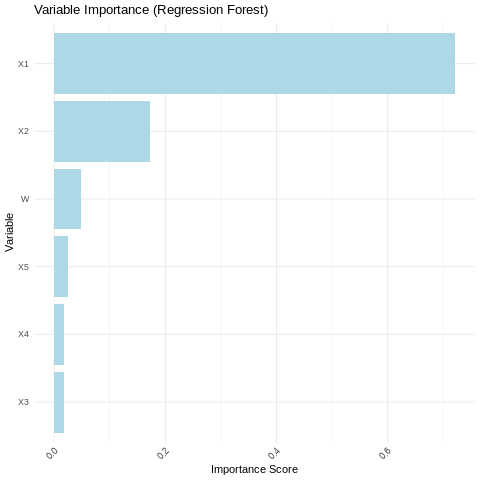

In [16]:
%%R
# Variable importance
var_importance <- variable_importance(rf)
colnames(XW) <- c(paste0("X", 1:p), "W")
names(var_importance) <- colnames(XW)
cat("Variable Importance:\n")
print(var_importance)
# Create data frame for ggplot2
var_imp_df <- data.frame(
  Variable = factor(names(var_importance), levels = names(var_importance)),
  Importance = var_importance
)

# Order by importance (descending)
var_imp_df <- var_imp_df[order(-var_imp_df$Importance), ]

# Plot variable importance using ggplot2
ggplot(var_imp_df, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  coord_flip() +
  labs(title = "Variable Importance (Regression Forest)",
       x = "Variable",
       y = "Importance Score") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Summary and Conclusion

Regression forests in the `{grf}` package provide a powerful and flexible framework for regression tasks, particularly when causal inference or heterogeneous treatment effects are of interest. By leveraging the strengths of random forests while incorporating advanced statistical techniques, `{grf}` regression forests can deliver robust predictions and insights into complex relationships in data. This tutorial demonstrated how to implement a regression forest using the `{grf}` package in R, showcasing its ability to predict continuous outcomes like housing prices based on various features. The model's performance was evaluated using RMSE and R-squared metrics, highlighting its effectiveness in capturing the underlying patterns in the data.
  


## References

1. Athey et al. (2019) on generalized random forests, and Wager & Athey (2018) on causal forests.

2. [Regression Forest](https://grf-labs.github.io/grf/reference/regression_forest.html)
